#  https://www.kaggle.com/sakshigoyal7/credit-card-customers   데이터 주소

## https://leaps.analyttica.com/sample_cases/11 데이터 설명 주소

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


data = pd.read_csv("./BankChurners.csv")


In [6]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500


In [ ]:
data.info()

### 데이터 정보
- 'CLIENTNUM' : 고객 식별 번호
- 'Attrition_Flag' : 신용 카드 이탈 여부 
    - Existing Customer : 잔류
    - Attrited Customer : 탈퇴
- 'Customer_Age' : 고객 나이
- 'Gender' : 성별
- 'Dependent_count' : 부양 가족 수
- 'Education_Level' : 고객 학력
- 'Marital_Status' : 결혼 여부
- 'Income_Category' : 연소득 구간
- 'Card_Category' : 신용 카드 등급
- 'Months_on_book' : 카드 할부 기간
- 'Total_Relationship_Count' : 가입 상품 수
- 'Months_Inactive_12_mon' : 1년 동안 카드 결재 내역이 없는 월 수
- 'Contacts_Count_12_mon' : 연락 횟수
- 'Credit_Limit' : 신용 한도
- 'Total_Revolving_Bal' : 할부 잔액
- 'Avg_Open_To_Buy' : 평균 실 사용 가능 금액 :  'Credit_Limit' -  'Total_Revolving_Bal'
- 'Total_Amt_Chng_Q4_Q1' : 결제 대금 기준 1분기 대비 4분기 (비율) 
- 'Total_Trans_Amt' : 실제 사용 총액
- 'Total_Trans_Ct' : 실제 사용 횟수
- 'Total_Ct_Chng_Q4_Q1' : 1분기 대비 4분기 결제 대금 횟수 비율
- 'Avg_Utilization_Ratio' : 'Total_Revolving_Bal'/ 'Credit_Limit' (할부 비율)


In [ ]:
# #data['Attrition_Flag'] = data['Attrition_Flag'].str[:1]
# data['Gender'] = data['Gender'].str[:1]
# data['Education_Level'] = data['Education_Level'].str[:3]
# data['Marital_Status'] = data['Marital_Status'].str[:1]
# data['Card_Category'] = data['Card_Category'].str[:1]
# data['Income_Category'] = data['Income_Category'].str[:2]

# data.head()



In [2]:
from sklearn import preprocessing

def encode_features(dataDf):
    #features = ['Attrited Customer','Existing Customer']
    #data['Attrition_Flag'] = data['Attrition_Flag'].str[:1]
    data['Gender'] = data['Gender'].str[:1]
    data['Education_Level'] = data['Education_Level'].str[:3]
    data['Marital_Status'] = data['Marital_Status'].str[:1]
    data['Card_Category'] = data['Card_Category'].str[:1]
    data['Income_Category'] = data['Income_Category'].str[:2]
    features = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Card_Category','Income_Category']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDf[feature])
        dataDf[feature] = le.transform(dataDf[feature])
        
    return dataDf


data = encode_features(data)


In [ ]:
data

In [3]:
data = data.drop(['CLIENTNUM','Avg_Utilization_Ratio'],axis =1 )


In [ ]:
data

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

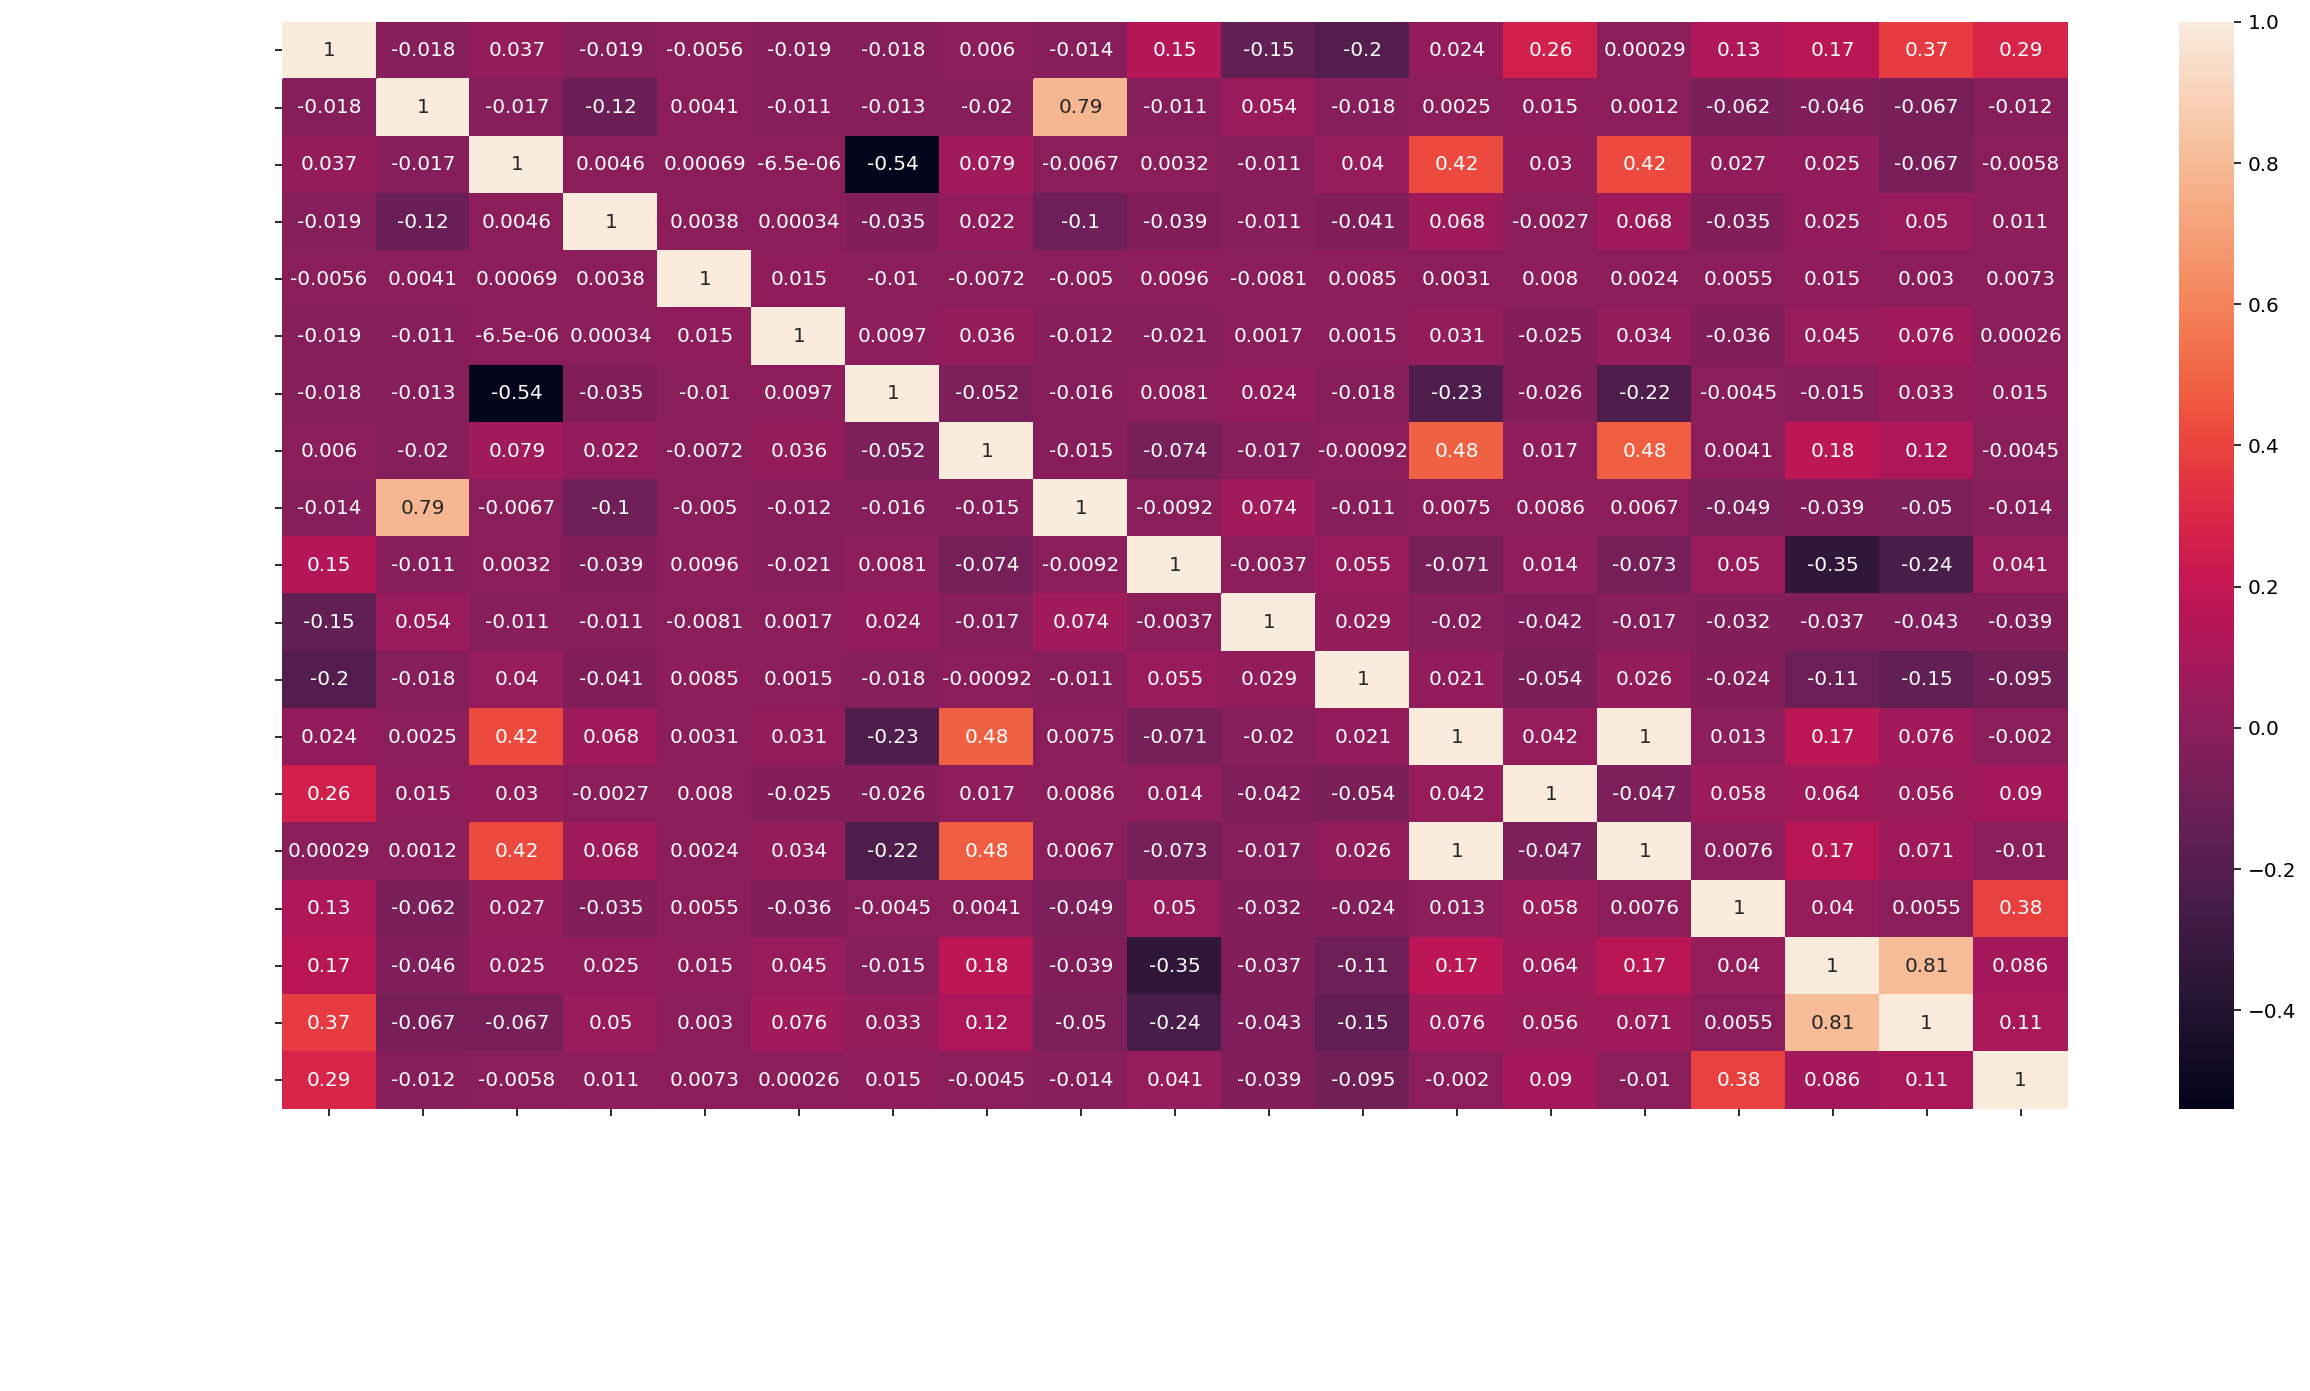

In [4]:
plt.subplots(figsize=(20,10))
plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')
sns.heatmap(data.corr(),annot=True)

In [ ]:

sns.displot(data['Total_Amt_Chng_Q4_Q1'])
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('Total_Amt_Chng_Q4_Q1', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)
plt.show()



Text(0.5, 6.79999999999999, 'Total_Amt_Chng_Q4_Q1')

Text(-2.700000000000003, 0.5, 'Count')

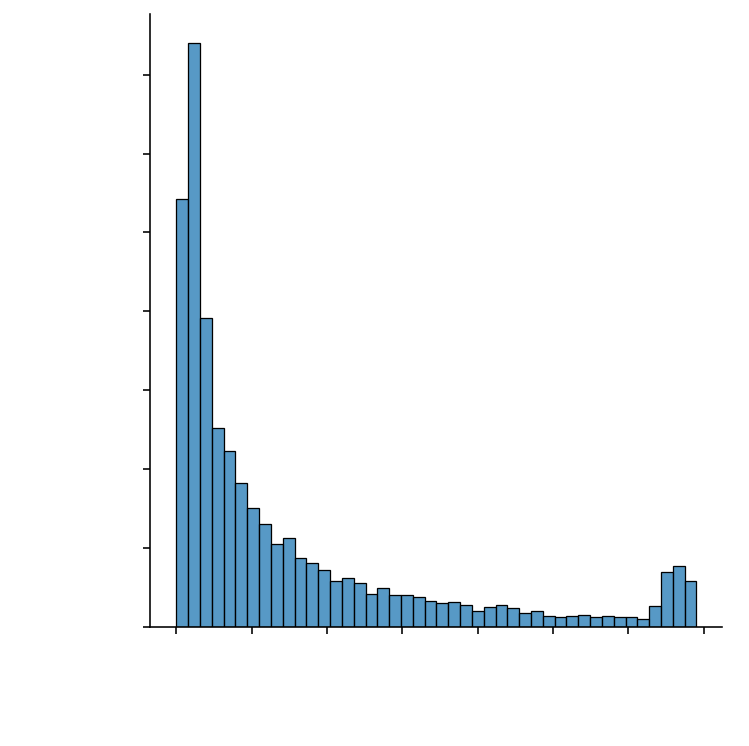

In [5]:
sns.displot(data['Avg_Open_To_Buy'])
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('Total_Amt_Chng_Q4_Q1', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)
plt.show()

Text(0.5, 6.79999999999999, 'Total_Amt_Chng_Q4_Q1')

Text(-2.700000000000003, 0.5, 'Count')

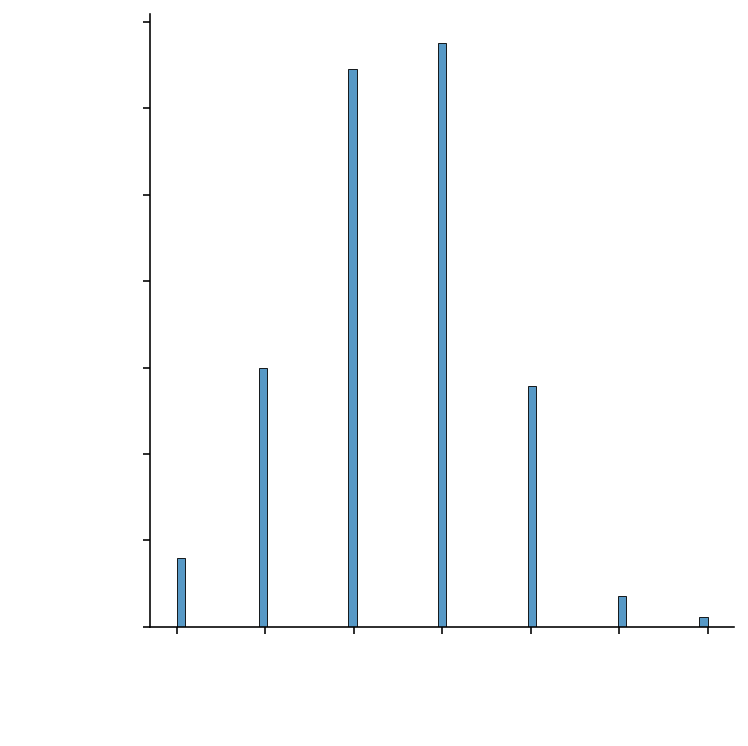

In [7]:
sns.displot(data['Contacts_Count_12_mon'])
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('Contacts_Count_12_mon', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)
plt.show()

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

<AxesSubplot:xlabel='Gender', ylabel='Density'>

<AxesSubplot:xlabel='Gender', ylabel='Density'>

<AxesSubplot:xlabel='Marital_Status', ylabel='Density'>

<AxesSubplot:xlabel='Marital_Status', ylabel='Density'>

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

Text(0.5, 0, 'Gender')

Text(0.5, 0, 'Marital_Status')

Text(0.5, 0, 'Customer_Age')

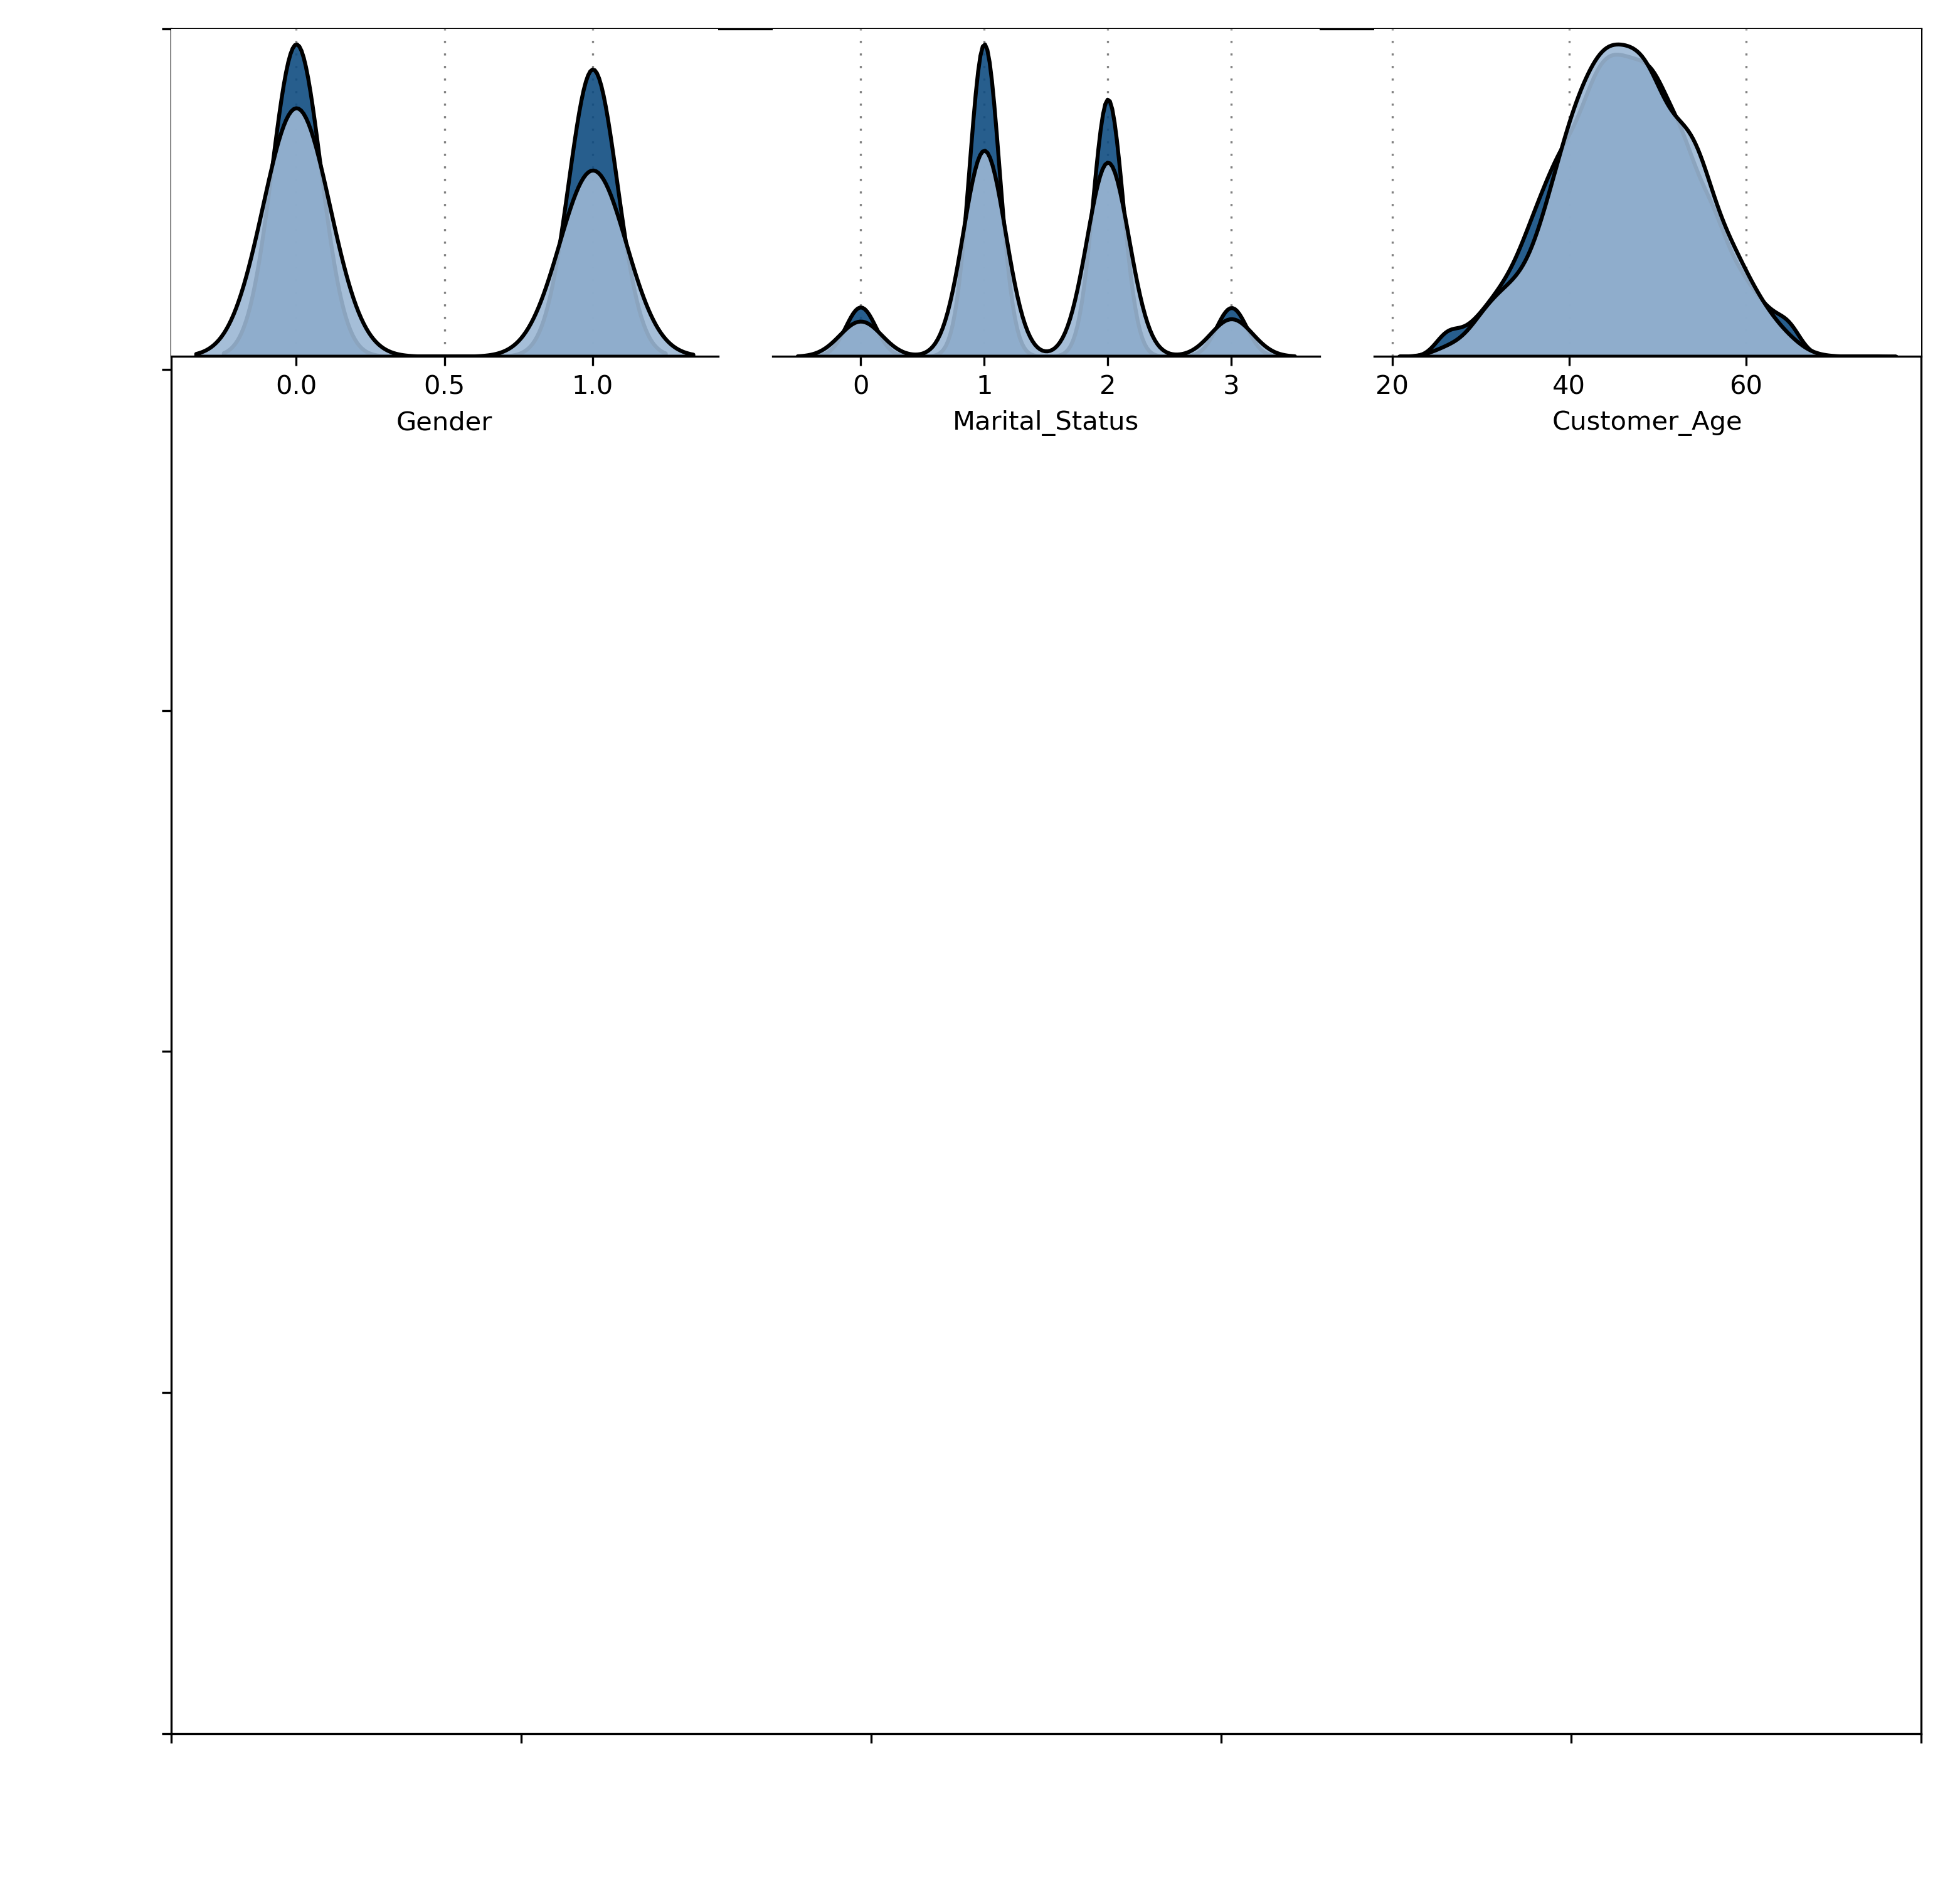

In [21]:
conts = ['Gender','Marital_Status','Customer_Age']
fig = plt.figure(figsize=(12, 12), dpi=150)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('X', labelpad=20, fontdict=font)
plt.ylabel('Y', labelpad=20, fontdict=font)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = data[data['Attrition_Flag'] == 1]
ns = data[data['Attrition_Flag'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Gender')
ax1.set_xlabel('Marital_Status')
ax2.set_xlabel('Customer_Age')

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Density'>

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Density'>

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Density'>

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Density'>

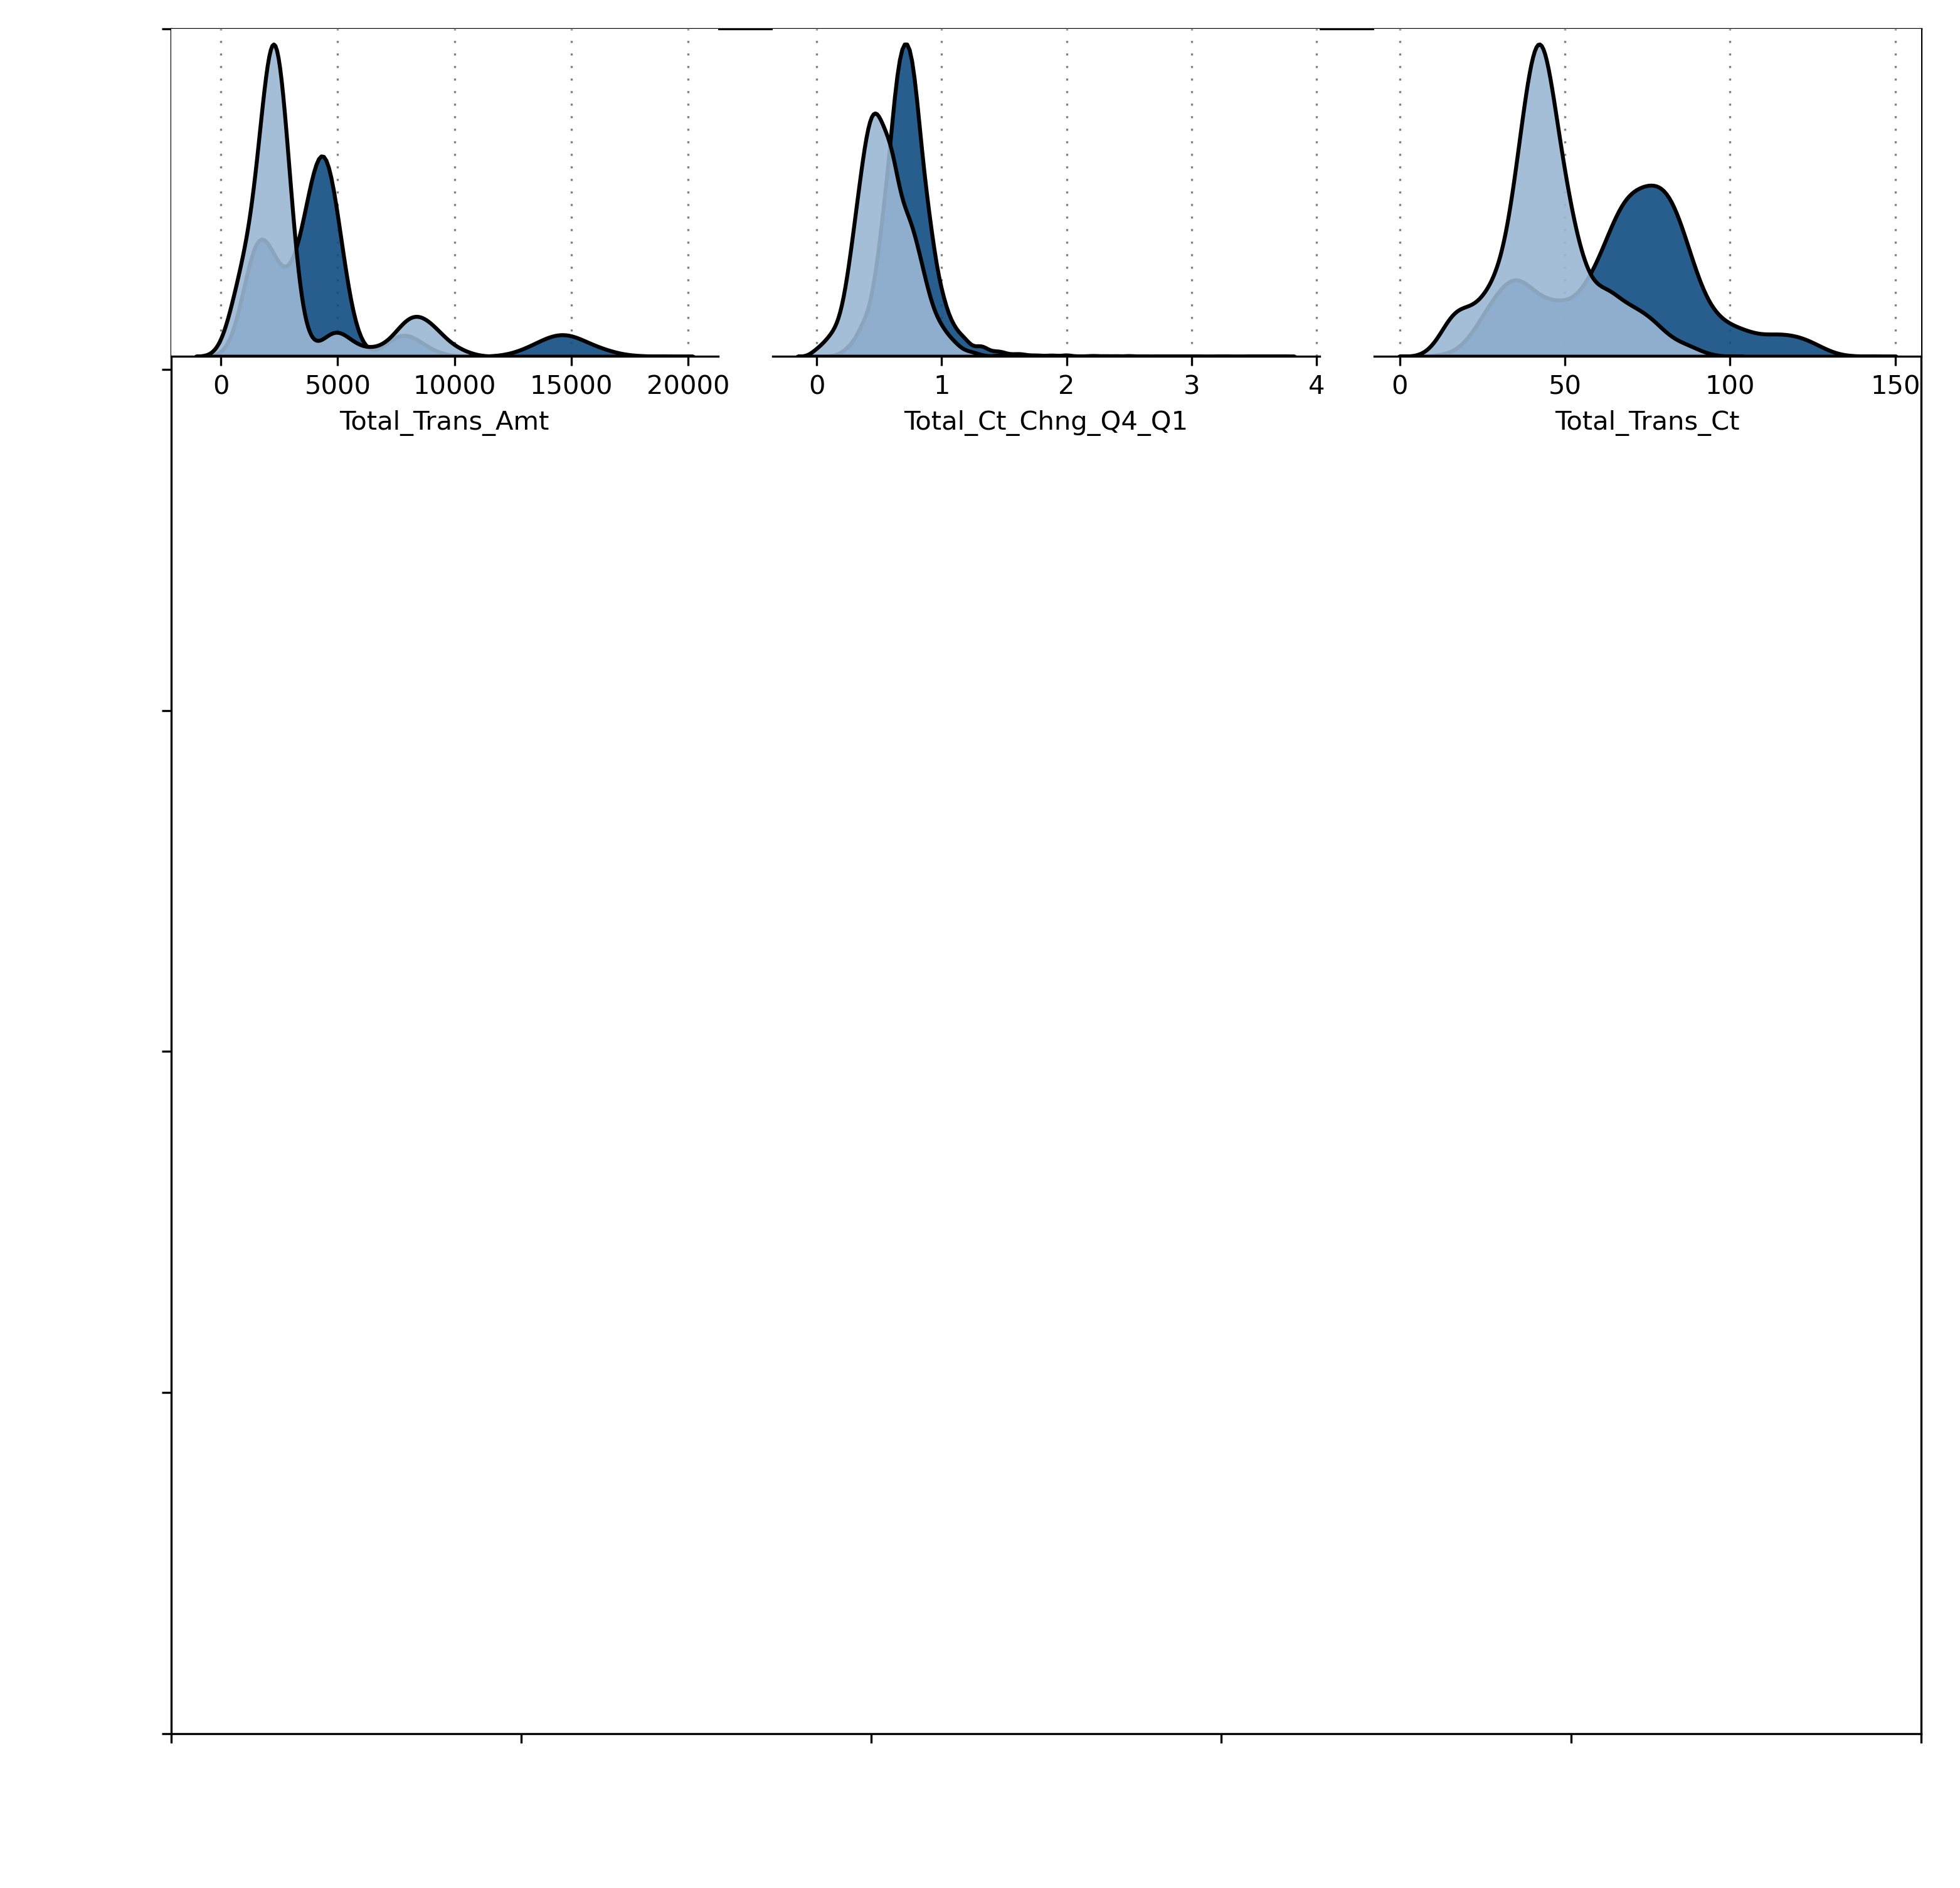

In [18]:
conts = ['Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct']
fig = plt.figure(figsize=(12, 12), dpi=150)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('X', labelpad=20, fontdict=font)
plt.ylabel('Y', labelpad=20, fontdict=font)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = data[data['Attrition_Flag'] == 1]
ns = data[data['Attrition_Flag'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1



Text(0.5, 1.0, '0 Total_Trans_Ct')

(array([ 65.,  80., 191., 502., 392., 161., 103.,  84.,  36.,  13.]),
 array([10. , 18.4, 26.8, 35.2, 43.6, 52. , 60.4, 68.8, 77.2, 85.6, 94. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Total_Trans_C1')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, '1 Total_Trans_Ct')

(array([ 110.,  902.,  871., 1003., 1991., 2224.,  750.,  331.,  275.,
          43.]),
 array([ 11. ,  23.8,  36.6,  49.4,  62.2,  75. ,  87.8, 100.6, 113.4,
        126.2, 139. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Total_Trans_C1')

Text(0, 0.5, 'Count')

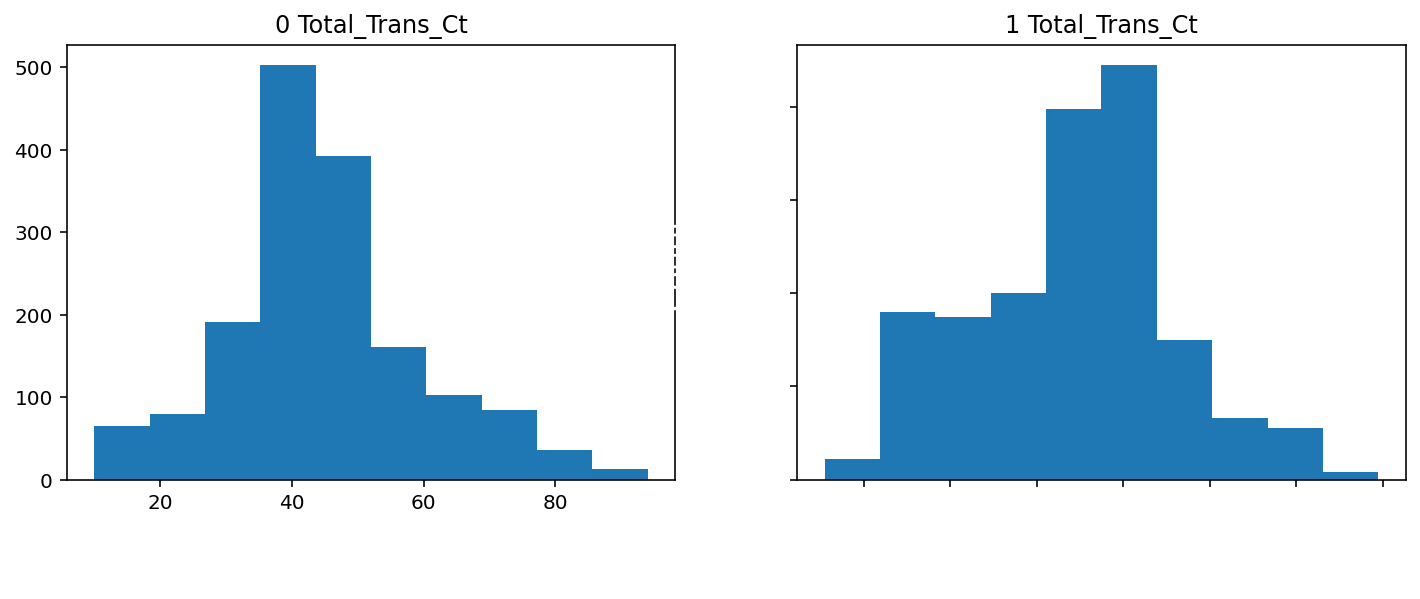

In [29]:
fig, (ax1,ax2) = plt.subplots(figsize=(12,4),nrows=1, ncols= 2)

font = {
        'color': 'white',
        'size' : 16
         }
plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

ax1.set_title('0 Total_Trans_Ct')
ax1.hist(df1['Total_Trans_Ct'])
plt.xlabel('Total_Trans_C1', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)

ax2.set_title('1 Total_Trans_Ct')
ax2.hist(df2['Total_Trans_Ct'])

plt.xlabel('Total_Trans_C1', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)



Text(0.5, 6.79999999999999, 'Total_Amt_Chng_Q4_Q1')

Text(3.674999999999997, 0.5, 'Count')

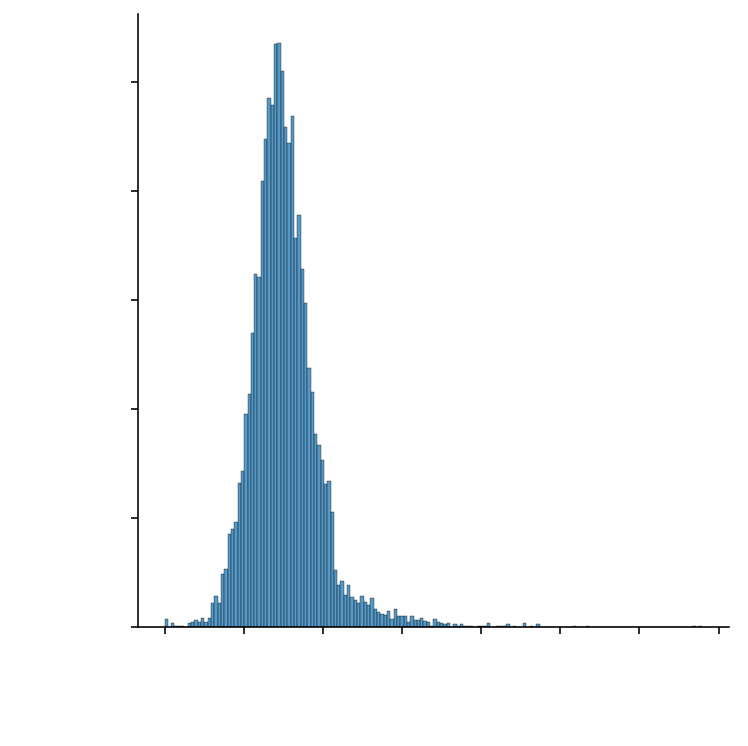

In [10]:



sns.displot(data['Total_Amt_Chng_Q4_Q1']) 
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('Total_Amt_Chng_Q4_Q1', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)
plt.show()

In [ ]:
np.log1p(data['Total_Trans_Amt'])

Text(0.5, 6.79999999999999, 'Total_Trans_Amt')

Text(-2.700000000000003, 0.5, 'Count')

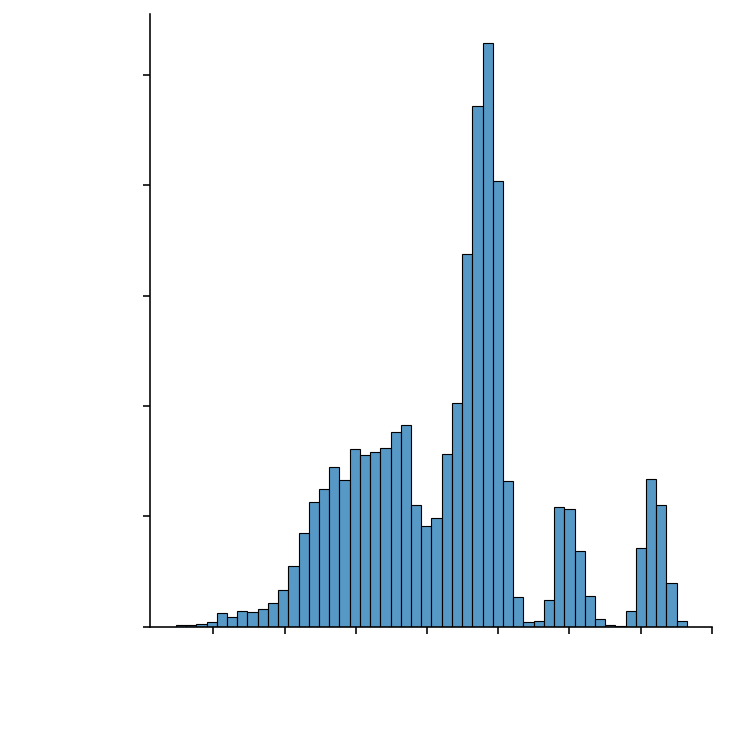

In [11]:
sns.displot(np.log1p(data['Total_Trans_Amt']))
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('Total_Trans_Amt', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)
plt.show()

In [25]:
df1 = data[data['Attrition_Flag']==0]
df2 = data[data['Attrition_Flag']==1]

df1.value_counts()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1
0               26            0       0                3                2               1                0              13              2                         2                       4                      1730.0        1616                 114.0            0.331                 869              27              0.286                  1
                50            0       4                2                2               4                0              37              1                         2                       3                      3699.0        913                  2786.0           0.866                 7297             71              0.690  

Text(0.5, 6.79999999999999, 'Total_Trans_Amt')

Text(3.674999999999997, 0.5, 'Count')

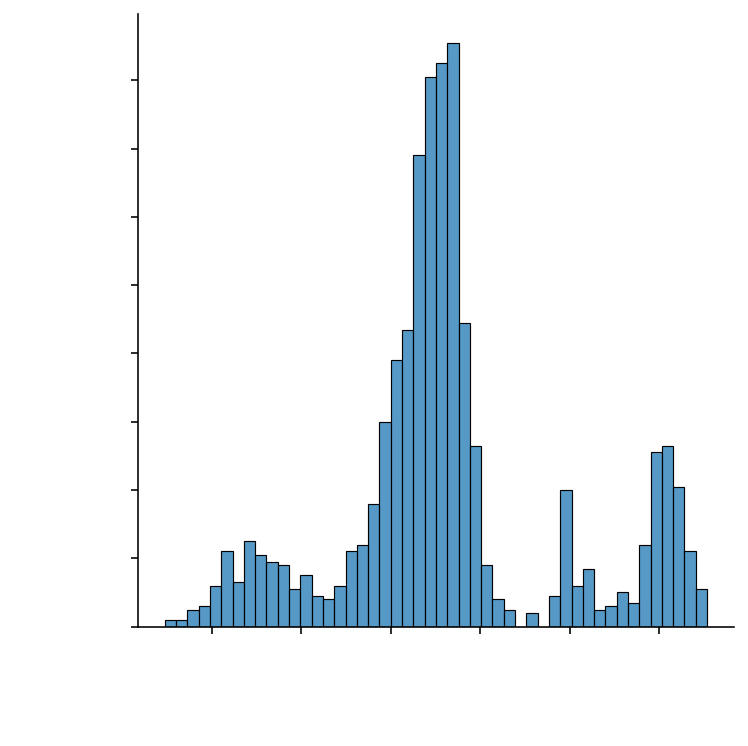

In [23]:

sns.displot(np.log1p(df1['Total_Trans_Amt']))



font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('Total_Trans_Amt', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)
plt.show()



Text(0.5, 6.79999999999999, 'Total_Trans_Amt')

Text(-2.700000000000003, 0.5, 'Count')

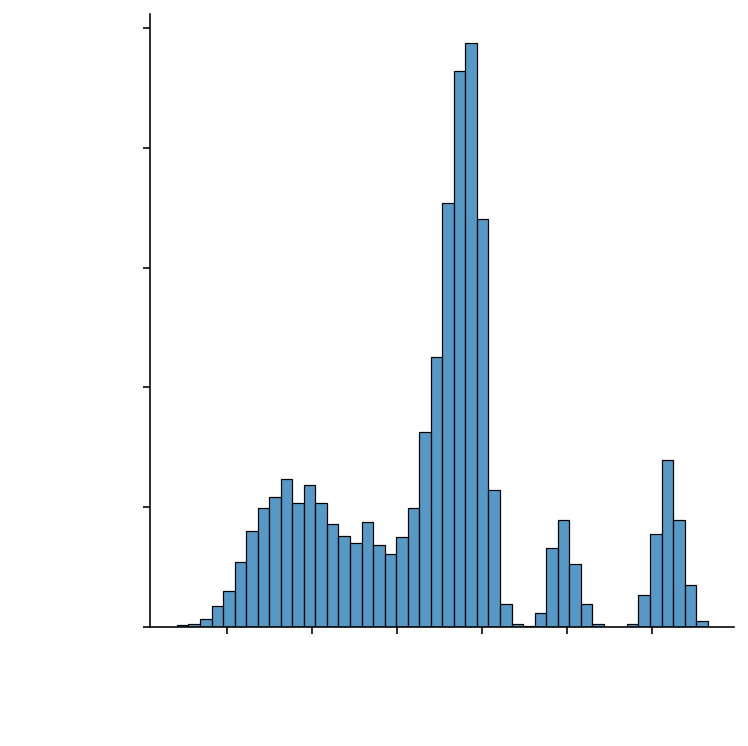

In [24]:
sns.displot(np.log1p(df2['Total_Trans_Amt']))



font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('Total_Trans_Amt', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)
plt.show()

Text(0.5, 0, 'X-Axis')

Text(0, 0.5, 'Y-Axis')

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Y-Axis'>

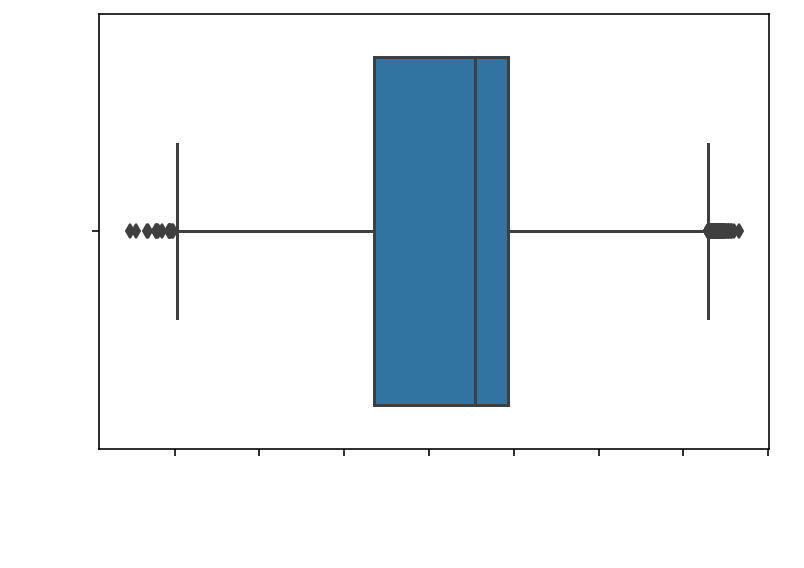

In [12]:
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('X-Axis', labelpad=20, fontdict=font)
plt.ylabel('Y-Axis', labelpad=20, fontdict=font)
sns.boxplot(x=np.log1p(data['Total_Trans_Amt']),data=data)

Text(0.5, 6.79999999999999, 'Total_Trans_Ct')

Text(3.674999999999997, 0.5, 'Count')

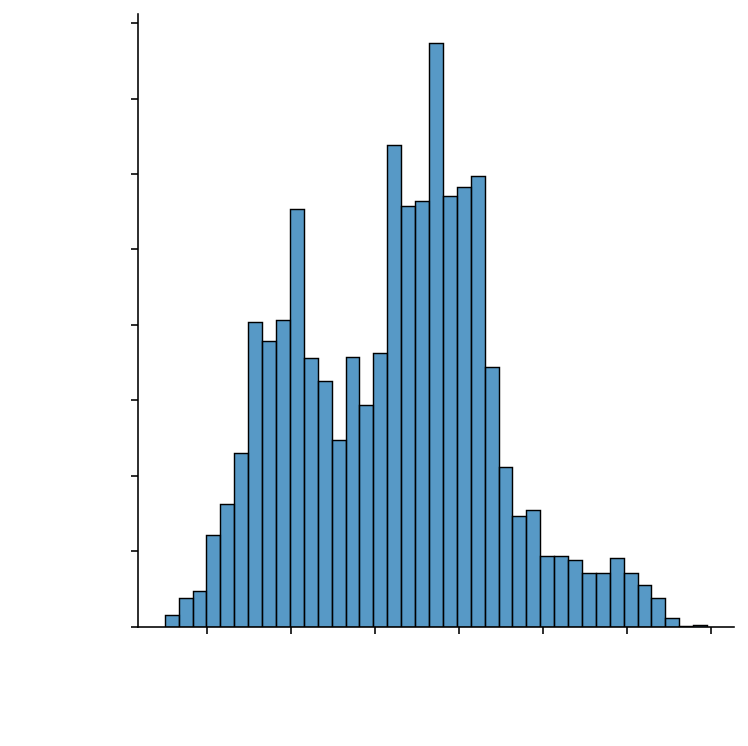

In [13]:
sns.displot(data['Total_Trans_Ct'])
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('Total_Trans_Ct', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)
plt.show()

Text(0.5, 6.79999999999999, 'Total_Ct_Chng_Q4_Q1')

Text(3.674999999999997, 0.5, 'Count')

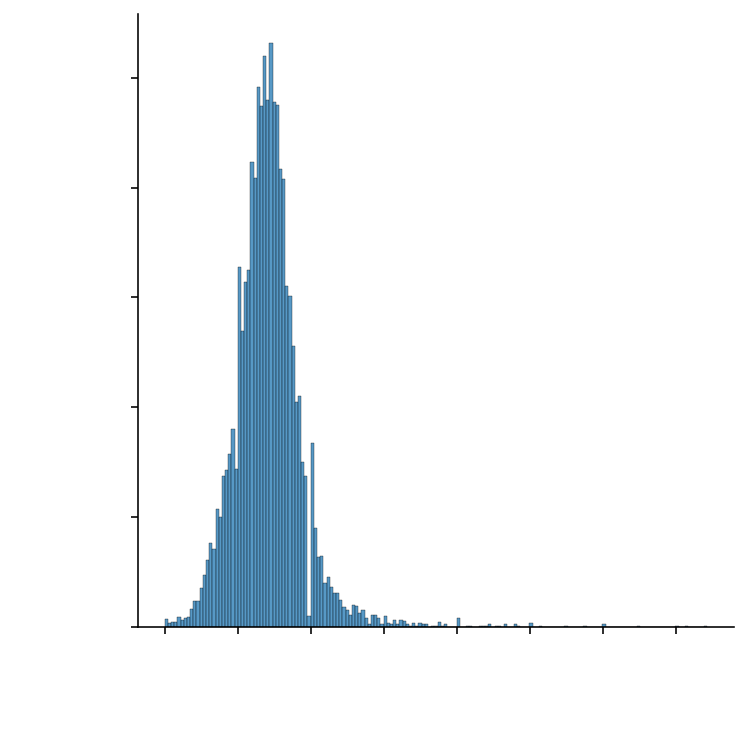

In [14]:
sns.displot(data['Total_Ct_Chng_Q4_Q1'])
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('Total_Ct_Chng_Q4_Q1', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)
plt.show()

In [15]:
sns.displot(data['Avg_Utilization_Ratio'])
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('Avg_Utilization_Ratio', labelpad=20, fontdict=font)
plt.ylabel('Count', labelpad=20, fontdict=font)
plt.show()

KeyError: 'Avg_Utilization_Ratio'

In [ ]:
plt.subplots(figsize=(20,10))
plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')
sns.heatmap(data.corr(),annot=True,square=True,cmap='YlGnBu')

In [ ]:
# font = {
#         'color': 'white',
#         'size' : 16
#          }

# plt.tick_params(axis='x',labelcolor='white')
# plt.tick_params(axis='y',labelcolor='white')

# plt.xlabel('X-Axis', labelpad=20, fontdict=font)
# plt.ylabel('Y-Axis', labelpad=20, fontdict=font)


# plt.pie(x = data['Education_Level'],y=data['Income_Category'])

data[(data['Education_Level']=='High School')&(data['Income_Category']=='Less than $40K') ] 

data[(data['Education_Level']=='High School')




In [ ]:
# Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1) 
# Total_Trans_Amt : Total Transaction Amount (Last 12 months)
# Total_Trans_Ct : Total Transaction Count (Last 12 months)
# Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1) 
# Avg_Utilization_Ratio	: Average Card Utilization Ratio


font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('X-Axis', labelpad=20, fontdict=font)
plt.ylabel('Y-Axis', labelpad=20, fontdict=font)
sns.boxplot(x='Total_Amt_Chng_Q4_Q1',data=data)

In [ ]:
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('X-Axis', labelpad=20, fontdict=font)
plt.ylabel('Y-Axis', labelpad=20, fontdict=font)

plt.barplot()

In [ ]:
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('X-Axis', labelpad=20, fontdict=font)
plt.ylabel('Y-Axis', labelpad=20, fontdict=font)
sns.boxplot(x='Total_Trans_Amt',data=data)

In [ ]:
font = {
        'color': 'white',
        'size' : 16
         }

plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('X-Axis', labelpad=20, fontdict=font)
plt.ylabel('Y-Axis', labelpad=20, fontdict=font)


sns.boxplot(x='Total_Trans_Ct',data=data)


In [ ]:
sns.barplot(x='Total_Trans_Ct',data=data)
sns.boxplot(x='Total_Trans_Ct',data=data)

In [ ]:
plt.bar(data['Total_Trans_Ct'])

In [ ]:
sns.barplot(data)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 아무런 학습을 하지 않고 성별에 따라 이탈자를 예측하는 단순한 분류기(classifier) 생성
# BaseEstimator를 상속받아 생성
from sklearn.base import BaseEstimator # ML 모델의 프레임을 생성해주는 모듈
class MyDummyClassfier(BaseEstimator) :
    def fit(self, X, y=None) : # 아무것도 학습하지 않음
        pass
        
    def predict(self,X) : # 예측은 단순히 sex feature가 1이면 0, 그렇지 않으면 1로 예측함
        pred = np.zeros((X.shape[0],1)) # 예측값 0으로 초기화 : 2차원 형태(,1)
        
        for i in range (X.shape[0]) :
            if X['Gender'].iloc[i] == 1 : # 남자이면
                pred[i]= 0
            else :
                pred[i] = 1
                
        return pred

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDf):
    #features = ['Attrited Customer','Existing Customer']
    data['Attrition_Flag'] = data['Attrition_Flag'].str[:1]
    data['Gender'] = data['Gender'].str[:1]
    data['Education_Level'] = data['Education_Level'].str[:3]
    data['Marital_Status'] = data['Marital_Status'].str[:1]
    data['Card_Category'] = data['Card_Category'].str[:1]
    data['Income_Category'] = data['Income_Category'].str[:2]
    features = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Card_Category','Income_Category']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDf[feature])
        dataDf[feature] = le.transform(dataDf[feature])
        
    return dataDf

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    data.drop(['Attrition_Flag','CLIENTNUM','Avg_Utilization_Ratio'],axis =1,inplace=True )
    return df
def transform_features(df):
    df = drop_features(df)
    df = encode_features(df)
    return df

In [ ]:
# 원본데이터 재로드

data = pd.read_csv("./BankChurners.csv")

In [ ]:
# 특징과 라벨 분리

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
Y_init = encode_features(data)
Y = data['Attrition_Flag']

# 원본데이터 다시 한 번 로드 X 때문에
data = pd.read_csv("./BankChurners.csv")
X = transform_features(data)
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  random_state=0)

In [ ]:
## 위에서 생성한 dummy 클래스를 이용해서 학습/예측/평가 수행
myclf = MyDummyClassfier()
myclf.fit(X_train, y_train)
mypred = myclf.predict(X_test)

print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypred)))

In [ ]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN


In [ ]:
Train_X.skew()

In [ ]:
data['Total_Trans_Amt'].hist()

In [ ]:
np.log10(Train_X['Total_Trans_Amt']).hist()

In [ ]:
# 왜도의 절대값이 1.5이상인 컬럼만 찾기

bias_val = Train_X.columns[Train_X.skew().abs() > 1.5]
bias_val